In [29]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [30]:
df_order = pd.read_csv('./dataset/Order-2023-11-13.csv')

In [31]:
month_counter = 0
current_month = 1  


for index, row in df_order.iterrows():
    df_order.at[index, 'created_at'] = (datetime(2023, current_month, 1) + timedelta(days=month_counter)).strftime('%Y-%m-%d %H:%M:%S')

    month_counter += 1

    
    if month_counter >= 160:
        month_counter = 0
        current_month += 1
        if current_month > 12:
            break  


df_order.to_csv('./dataset/modified_order.csv', index=False)

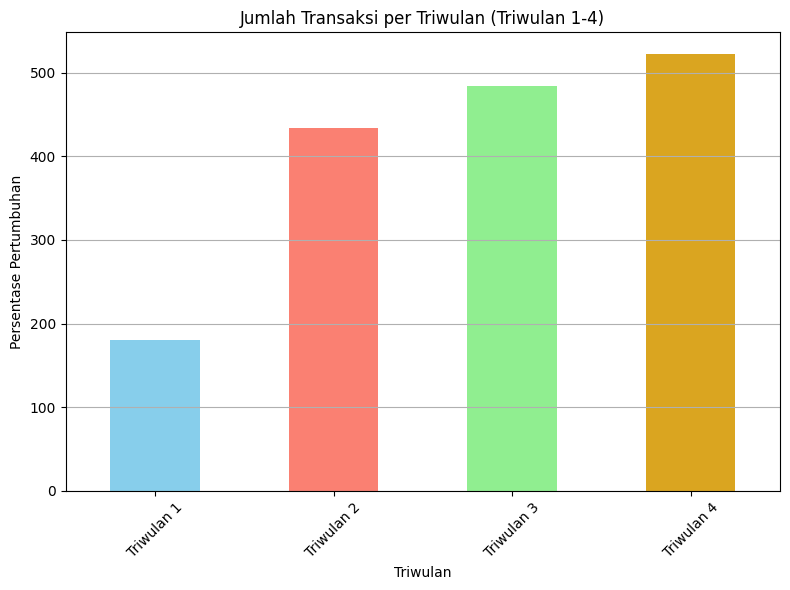

In [33]:
df_order['created_at'] = pd.to_datetime(df_order['created_at'])


df_order = df_order[
    (df_order['created_at'].dt.year == 2023) & 
    (df_order['created_at'].dt.quarter <= 4) 
]


transactions_per_quarter = df_order.groupby(df_order['created_at'].dt.to_period("Q")).size()


plt.figure(figsize=(8, 6))
colors = ['skyblue', 'salmon', 'lightgreen', 'goldenrod']
quarters = ['Triwulan 1', 'Triwulan 2', 'Triwulan 3', 'Triwulan 4']
transactions_per_quarter.plot(kind='bar', color=colors)
plt.title('Jumlah Transaksi per Triwulan (Triwulan 1-4)')
plt.xlabel('Triwulan')
plt.ylabel('Persentase Pertumbuhan')
plt.xticks(range(len(quarters)), quarters, rotation=45)
plt.grid(axis='y')


plt.tight_layout()
plt.show()